In [4]:
install.packages("recommenderlab")


also installing the dependencies 'RcppProgress', 'arules', 'proxy', 'registry', 'irlba', 'recosystem'



package 'RcppProgress' successfully unpacked and MD5 sums checked
package 'arules' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'recosystem' successfully unpacked and MD5 sums checked
package 'recommenderlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\xingxuan_dell\AppData\Local\Temp\RtmpERqpEH\downloaded_packages


In [1]:
library(recommenderlab)
library(tidyverse)

Loading required package: Matrix
Loading required package: arules

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: proxy

Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Loading required package: registry
Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  2.1.1     v dplyr  

https://rpubs.com/jt_rpubs/285729

# Dataset Exploration

Explore the data from our classmates, including our goup.

In [2]:
setwd("D:/BAX401/HW4")
raw_data<-read.csv('raw_data.csv')
head(raw_data,10)
dim(raw_data)
summary(raw_data)

Serial.Number,First.Name,Last.Name,Section,Group,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
1,Yao-Ting,Wang,1,1,NA,NA,NA,NA,NA,...,NA,NA,5,NA,NA,NA,NA,NA,5,NA
2,Rajasa,Kakkera,1,5,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,4,NA,5,NA
3,NAN,LIANG,2,9,4,NA,NA,3,4,...,4,NA,3,3,4,NA,NA,NA,3,NA
4,Ruizhi,Ma,1,8,NA,NA,NA,4,5,...,NA,NA,NA,4,NA,NA,4,NA,4,3
5,Shivani,Sharma,2,10,NA,NA,NA,NA,NA,...,5,NA,2,5,5,NA,3,NA,4,3
6,Xingxuan,Zhang,1,3,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,5,NA
7,Calvin,Wu,1,8,4,NA,NA,5,5,...,NA,NA,4,NA,NA,NA,NA,NA,5,NA
8,Nidhi,Patni,1,6,4,NA,NA,NA,3,...,NA,NA,NA,NA,NA,NA,3,NA,4,NA
9,Yuanyuan,Ge,1,8,4,NA,5,5,5,...,5,NA,5,NA,NA,NA,NA,NA,4,NA
10,Joey,Li,2,2,4,NA,NA,NA,3,...,5,NA,NA,NA,NA,NA,5,NA,NA,NA


[1] 98 55

 Serial.Number     First.Name   Last.Name     Section         Group     
 Min.   : 1.00   Jing   : 2   Huang  : 6   Min.   :1.00   Min.   : 1.0  
 1st Qu.:25.25   Adam   : 1   Li     : 6   1st Qu.:1.00   1st Qu.: 3.0  
 Median :49.50   Aijie  : 1   Wang   : 5   Median :2.00   Median : 5.5  
 Mean   :49.50   Alayna : 1   Zhang  : 3   Mean   :1.51   Mean   : 5.5  
 3rd Qu.:73.75   Alice  : 1   Hao    : 2   3rd Qu.:2.00   3rd Qu.: 8.0  
 Max.   :98.00   Allyson: 1   He     : 2   Max.   :2.00   Max.   :10.0  
                 (Other):91   (Other):74                                
 The.Social.Network   A.Prophet         Amour      The.King.s.Speech
 Min.   :1.000      Min.   :1.000   Min.   :2.00   Min.   :2.000    
 1st Qu.:3.000      1st Qu.:3.000   1st Qu.:4.25   1st Qu.:4.000    
 Median :4.000      Median :4.000   Median :5.00   Median :4.000    
 Mean   :3.787      Mean   :3.429   Mean   :4.25   Mean   :4.283    
 3rd Qu.:4.000      3rd Qu.:4.000   3rd Qu.:5.00   3rd Qu.:5.000    
 M

In [3]:
raw_data_ratings <- raw_data[,6:ncol(raw_data)]
min(raw_data_ratings,na.rm = TRUE)
max(raw_data_ratings,na.rm = TRUE)

[1] 1

[1] 5

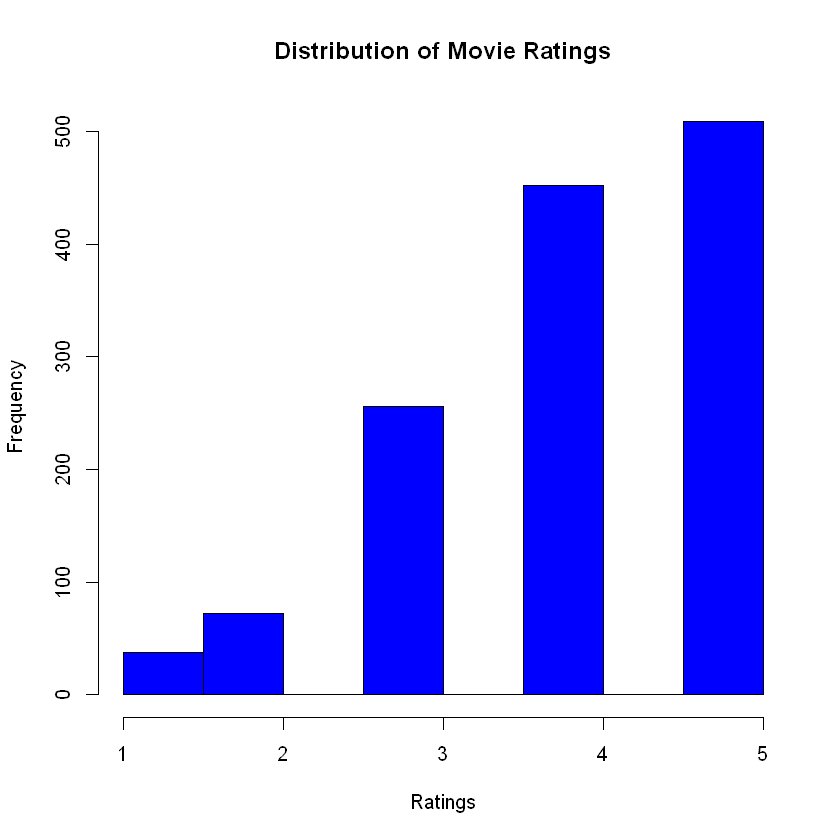

In [4]:
hist(as.vector(as.matrix(raw_data_ratings)), main = "Distribution of Movie Ratings",
     col = "blue", xlab = "Ratings")

In [5]:
summary(as.vector(as.matrix(raw_data_ratings)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   4.000   3.998   5.000   5.000    3574 

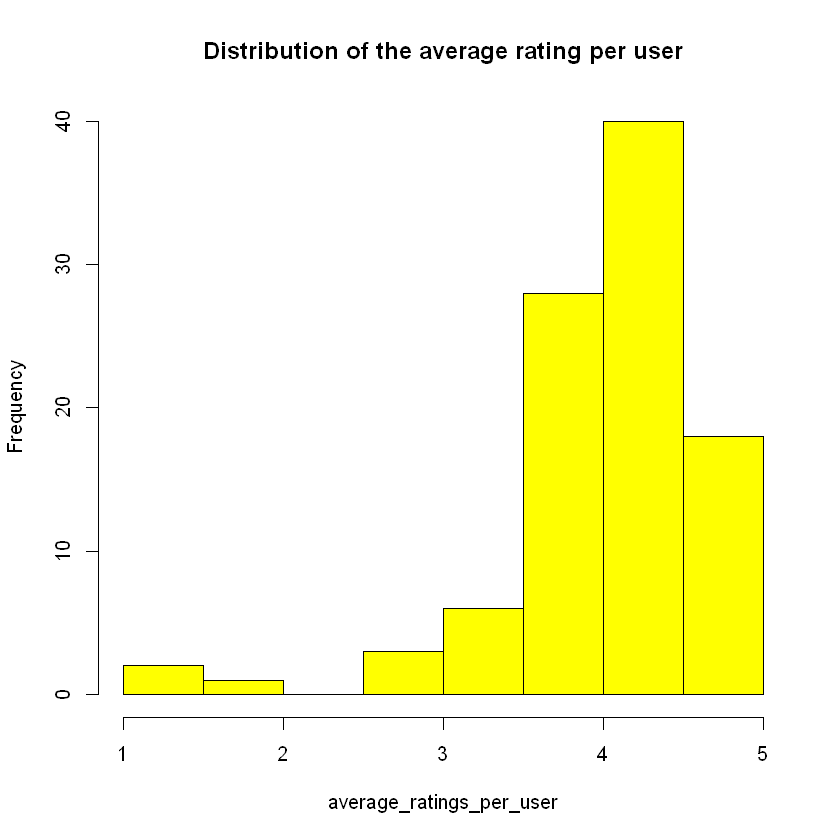

In [6]:
average_ratings_per_user <- rowMeans(raw_data_ratings, na.rm = TRUE)

hist(average_ratings_per_user, main = "Distribution of the average rating per user",col = "yellow")

# Create Test and Train Dataset

The test group is the group 3 in section 1. The train dataset should exclude the test group.

Serial.Number,First.Name,Last.Name,Section,Group,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
1,Yao-Ting,Wang,1,1,NA,NA,NA,NA,NA,...,NA,NA,5,NA,NA,NA,NA,NA,5,NA
2,Rajasa,Kakkera,1,5,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,4,NA,5,NA
3,NAN,LIANG,2,9,4,NA,NA,3,4,...,4,NA,3,3,4,NA,NA,NA,3,NA
4,Ruizhi,Ma,1,8,NA,NA,NA,4,5,...,NA,NA,NA,4,NA,NA,4,NA,4,3
5,Shivani,Sharma,2,10,NA,NA,NA,NA,NA,...,5,NA,2,5,5,NA,3,NA,4,3
6,Xingxuan,Zhang,1,3,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,5,NA


In [7]:
group_3<- raw_data[raw_data$Section==1 & raw_data$Group==3, ]
other_data<-raw_data[!(raw_data$Section==1 & raw_data$Group==3), ]
nrow(other_data)

[1] 93

In [8]:
raw_data_ratings<-other_data[,6:ncol(other_data)]
raw_data_ratings<-raw_data_ratings[rowSums(is.na(raw_data_ratings)) <=48,]
nrow(raw_data_ratings)


[1] 92

In [15]:
rmat <- as.matrix(raw_data_ratings)
rmat <- as(rmat,"realRatingMatrix")
group<-as(as.matrix(group_3[,6:ncol(group_3)]),"realRatingMatrix")

all_raw<-as(as.matrix(raw_data[,6:ncol(other_data)]),"realRatingMatrix")
e <- evaluationScheme(rmat, method="split", train=0.8, given=3, goodRating=5)

e


Evaluation scheme with 3 items given
Method: 'split' with 1 run(s).
Training set proportion: 0.800
Good ratings: >=5.000000
Data set: 92 x 50 rating matrix of class 'realRatingMatrix' with 1265 ratings.

# The Recommendation Algorithms

## User-Based Collaborative Filtering: Cosine Similarity

In [16]:
#train UBCF cosine similarity models

# non-normalized
UBCF_N_C <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = NULL, method="Cosine"))

# centered
UBCF_C_C <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "center",method="Cosine"))

# Z-score normalization
UBCF_Z_C <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "Z-score",method="Cosine"))

In [17]:
# compute predicted ratings
p1 <- predict(UBCF_N_C, getData(e, "known"), type="ratings")

p2 <- predict(UBCF_C_C, getData(e, "known"), type="ratings")

p3 <- predict(UBCF_Z_C, getData(e, "known"), type="ratings")
 

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] < 0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] < 0] <- 0
p2@data@x[p2@data@x[] > 5] <- 5

p3@data@x[p3@data@x[] < 0] <- 0
p3@data@x[p3@data@x[] > 5] <- 5

In [18]:


# aggregate the performance statistics
error_UCOS <- rbind(
  UBCF_N_C = calcPredictionAccuracy(p1, getData(e, "unknown")),
  UBCF_C_C = calcPredictionAccuracy(p2, getData(e, "unknown")),
  UBCF_Z_C = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_UCOS

,RMSE,MSE,MAE
UBCF_N_C,2.6574627,7.0621080,2.3484871
UBCF_C_C,0.9623409,0.9261001,0.7811934
UBCF_Z_C,0.9618645,0.9251834,0.7807182


In [19]:
UBCF_C_C <- Recommender(all_raw, "UBCF", 
      param=list(normalize = "center",method="Cosine"))

In [20]:
my_rating<-predict(UBCF_C_C, all_raw[c(6,26,50,55,85)], type="ratings")

In [21]:
as(my_rating, "matrix")

The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
3.917949,3.875878,4.016185,4.097537,4.022854,3.977247,NA,4.016572,4.039495,4.000000,...,3.988015,4.000000,4.190888,4.063121,4.011202,4.015373,4.075653,3.995829,NA,3.955840
3.982426,3.989678,4.000000,4.131506,NA,4.023150,NA,4.048399,4.097047,4.000000,...,3.958581,4.000000,NA,3.917076,4.013774,4.000000,4.083352,4.000000,4.152003,4.000384
3.950123,4.094357,4.137340,3.974839,NA,4.111849,NA,NA,4.140053,4.090909,...,4.051836,4.090909,4.083732,4.041003,4.090909,4.090909,NA,4.090909,4.211023,4.029763
4.065345,4.230769,4.245065,NA,NA,4.332619,NA,NA,4.230769,4.230769,...,4.381575,4.230769,NA,NA,4.286113,4.245045,4.434729,4.230769,4.195257,4.225677
NA,4.137931,4.137931,NA,NA,4.240598,NA,4.143608,NA,4.137931,...,4.097874,4.137931,NA,NA,4.137931,4.137931,NA,4.137931,NA,NA


## User-Based Collaborative Filtering: Euclidean Distance

In [22]:
#train UBCF Euclidean Distance models

# non-normalized
UBCF_N_E <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = NULL, method="Euclidean"))

# centered
UBCF_C_E <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "center",method="Euclidean"))

# Z-score normalization
UBCF_Z_E <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "Z-score",method="Euclidean"))

In [23]:
# compute predicted ratings
p1 <- predict(UBCF_N_E, getData(e, "known"), type="ratings")

p2 <- predict(UBCF_C_E, getData(e, "known"), type="ratings")

p3 <- predict(UBCF_Z_E, getData(e, "known"), type="ratings")

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] <  0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] < 0] <- 0
p2@data@x[p2@data@x[]> 5] <- 5

p3@data@x[p3@data@x[] < 0] <- 0
p3@data@x[p3@data@x[]> 5] <- 5

# aggregate the performance statistics
error_UEUC <- rbind(
  UBCF_N_E = calcPredictionAccuracy(p1, getData(e, "unknown")),
  UBCF_C_E = calcPredictionAccuracy(p2, getData(e, "unknown")),
  UBCF_Z_E = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_UEUC

,RMSE,MSE,MAE
UBCF_N_E,2.5737361,6.6241176,2.2544387
UBCF_C_E,0.9615472,0.9245731,0.7730274
UBCF_Z_E,0.9691112,0.9391765,0.7823945


In [24]:
UBCF_C_C <- Recommender(all_raw, "UBCF", 
      param=list(normalize = "center",method="Euclidean"))
my_rating<-predict(UBCF_C_C, all_raw[c(6,26,50,55,85)], type="ratings")
as(my_rating, "matrix")

The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
3.856773,3.809657,4.002453,4.076551,3.959427,3.984733,NA,3.991805,4.020732,4.000000,...,3.998327,4.000000,4.120729,4.030752,3.991805,4.000000,4.063389,3.991805,NA,3.988881
3.982332,3.980662,4.011011,4.092449,NA,4.043354,NA,3.980662,4.043288,4.000000,...,3.967000,4.000000,NA,3.897270,4.000000,4.000000,3.945430,4.000000,4.081897,4.010798
4.064841,4.068967,4.120268,3.968694,NA,4.110038,NA,NA,4.146469,4.090909,...,4.100683,4.090909,4.135279,4.042981,4.100873,4.090909,NA,4.073912,4.101490,4.057703
4.124531,4.132969,4.243735,NA,NA,4.294678,NA,NA,4.219832,4.230769,...,4.266667,4.230769,NA,NA,4.250329,4.243455,4.286835,4.227477,4.224168,4.227718
NA,4.040177,4.135684,NA,NA,4.172748,NA,4.095775,NA,4.137931,...,4.077576,4.137931,NA,NA,4.146159,4.137931,NA,4.116843,NA,NA


## User-Based Collaborative Filtering: Pearson Correlation

In [25]:
#train UBCF pearson correlation models

# non-normalized
UBCF_N_P <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = NULL, method="pearson"))

# centered
UBCF_C_P <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "center",method="pearson"))

# Z-score normalization
UBCF_Z_P <- Recommender(getData(e, "train"), "UBCF", 
      param=list(normalize = "Z-score",method="pearson"))

In [26]:
# compute predicted ratings
p1 <- predict(UBCF_N_P, getData(e, "known"), type="ratings")

p2 <- predict(UBCF_C_P, getData(e, "known"), type="ratings")

p3 <- predict(UBCF_Z_P, getData(e, "known"), type="ratings")



# aggregate the performance statistics
error_UPC <- rbind(
  UBCF_N_P = calcPredictionAccuracy(p1, getData(e, "unknown")),
  UBCF_C_P = calcPredictionAccuracy(p2, getData(e, "unknown")),
  UBCF_Z_P = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_UPC

,RMSE,MSE,MAE
UBCF_N_P,2.4988911,6.2444565,2.3109208
UBCF_C_P,0.9351967,0.8745928,0.7327993
UBCF_Z_P,0.9366505,0.8773142,0.7439749


## Item-Based Collaborative Filtering: Cosine Similarity

In [27]:
#train IBCF cosine similarity models

# non-normalized
IBCF_N_C <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = NULL, method="Cosine"))

# centered
IBCF_C_C <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "center",method="Cosine"))

# Z-score normalization
IBCF_Z_C <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "Z-score",method="Cosine"))

In [28]:
# compute predicted ratings
p1 <- predict(IBCF_N_C, getData(e, "known"), type="ratings")

p2 <- predict(IBCF_C_C, getData(e, "known"), type="ratings")

p3 <- predict(IBCF_Z_C, getData(e, "known"), type="ratings")

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] <  0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] <  0] <- 0
p2@data@x[p2@data@x[] > 5] <- 5

p3@data@x[p3@data@x[] <  0] <- 0
p3@data@x[p3@data@x[] > 5] <- 5

# aggregate the performance statistics
error_ICOS <- rbind(
  IBCF_N_C = calcPredictionAccuracy(p1, getData(e, "unknown")),
  IBCF_C_C = calcPredictionAccuracy(p2, getData(e, "unknown")),
  IBCF_Z_C = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_ICOS

,RMSE,MSE,MAE
IBCF_N_C,1.046320,1.094785,0.8027298
IBCF_C_C,1.142070,1.304324,0.8613982
IBCF_Z_C,1.113993,1.240981,0.8506068


## Item-Based Collaborative Filtering: Euclidean Distance

In [29]:
#train IBCF Euclidean Distance models

# non-normalized
IBCF_N_E <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = NULL, method="Euclidean"))

# centered
IBCF_C_E <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "center",method="Euclidean"))

# Z-score normalization
IBCF_Z_E <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "Z-score",method="Euclidean"))

In [30]:
# compute predicted ratings
p1 <- predict(IBCF_N_E, getData(e, "known"), type="ratings")

p2 <- predict(IBCF_C_E, getData(e, "known"), type="ratings")

p3 <- predict(IBCF_Z_E, getData(e, "known"), type="ratings")

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] <  0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] <  0] <- 0
p2@data@x[p2@data@x[] > 5] <- 5

p3@data@x[p3@data@x[] <  0] <- 0
p3@data@x[p3@data@x[] > 5] <- 5

# aggregate the performance statistics
error_IEUC <- rbind(
  IBCF_N_E = calcPredictionAccuracy(p1, getData(e, "unknown")),
  IBCF_C_E = calcPredictionAccuracy(p2, getData(e, "unknown")),
  IBCF_Z_E = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_IEUC

,RMSE,MSE,MAE
IBCF_N_E,1.056092,1.115330,0.8273438
IBCF_C_E,1.084655,1.176477,0.8525114
IBCF_Z_E,1.037139,1.075657,0.8057835


## Item-Based Collaborative Filtering: Pearson Correlation

In [31]:
#train IBCF pearson correlation models

# non-normalized
IBCF_N_P <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = NULL, method="pearson"))

# centered
IBCF_C_P <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "center",method="pearson"))

# Z-score normalization
IBCF_Z_P <- Recommender(getData(e, "train"), "IBCF", 
      param=list(normalize = "Z-score",method="pearson"))

In [32]:
# compute predicted ratings
p1 <- predict(IBCF_N_P, getData(e, "known"), type="ratings")

p2 <- predict(IBCF_C_P, getData(e, "known"), type="ratings")

p3 <- predict(IBCF_Z_P, getData(e, "known"), type="ratings")

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] <  0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] <  0] <- 0
p2@data@x[p2@data@x[] > 5] <- 5

p3@data@x[p3@data@x[] <  0] <- 0
p3@data@x[p3@data@x[] > 5] <- 5

# aggregate the performance statistics
error_IPC <- rbind(
  IBCF_N_P = calcPredictionAccuracy(p1, getData(e, "unknown")),
  IBCF_C_P = calcPredictionAccuracy(p2, getData(e, "unknown")),
  IBCF_Z_P = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_IPC

,RMSE,MSE,MAE
IBCF_N_P,0.9427687,0.8888128,0.7449133
IBCF_C_P,1.0147234,1.0296636,0.8032048
IBCF_Z_P,1.0164476,1.0331657,0.8102163


## ALS

In [58]:
#train IBCF pearson correlation models

# non-normalized
ALS_N <- Recommender(getData(e, "train"), "ALS", 
      param=list(normalize=NULL, lambda=0.0999, n_factors=10, n_iterations=10, seed = 1234, verbose = FALSE))

# centered
ALS_C <- Recommender(getData(e, "train"), "ALS", 
      param=list(normalize = NULL, lambda=0.0999, n_factors=10, n_iterations=10, seed = 1234, verbose = FALSE))

# Z-score normalization
ALS_Z <- Recommender(getData(e, "train"), "ALS", 
      param=list(normalize = NULL, lambda=0.1, n_factors=200, n_iterations=100, seed = 1234, verbose = FALSE))

In [59]:
# compute predicted ratings
p1 <- predict(ALS_N, getData(e, "known"), type="ratings")

p2 <- predict(ALS_C, getData(e, "known"), type="ratings")

p3 <- predict(ALS_Z, getData(e, "known"), type="ratings")

# set all predictions that fall outside the valid range to the boundary values
p1@data@x[p1@data@x[] <  0] <- 0
p1@data@x[p1@data@x[] > 5] <- 5

p2@data@x[p2@data@x[] <  0] <- 0
p2@data@x[p2@data@x[] > 5] <- 5

p3@data@x[p3@data@x[] <  0] <- 0
p3@data@x[p3@data@x[] > 5] <- 5

# aggregate the performance statistics
error_IPC <- rbind(
  ALS_N = calcPredictionAccuracy(p1, getData(e, "unknown")),
  ALS_C = calcPredictionAccuracy(p2, getData(e, "unknown")),
  ALS_Z = calcPredictionAccuracy(p3, getData(e, "unknown"))
)
error_IPC

,RMSE,MSE,MAE
ALS_N,1.132738,1.283095,0.8971046
ALS_C,1.132738,1.283095,0.8971046
ALS_Z,1.171270,1.371872,0.9478695


# Conclusion

In [210]:
c_res <- data.frame(rbind(error_UCOS, error_UEUC, error_UPC, error_ICOS, error_IEUC, error_IPC))

c_res[order(c_res$RMSE ),]

,RMSE,MSE,MAE
UBCF_C_P,0.7984235,0.6374801,0.6882476
UBCF_Z_P,0.7984322,0.6374941,0.6898722
UBCF_Z_C,1.0316313,1.0642632,0.8391653
UBCF_C_E,1.0316735,1.0643502,0.8472380
UBCF_C_C,1.0324599,1.0659735,0.8453428
UBCF_Z_E,1.0340969,1.0693564,0.8473650
IBCF_N_E,1.0773371,1.1606553,0.8213670
IBCF_N_C,1.0855458,1.1784096,0.8346155
IBCF_N_P,1.0919247,1.1922996,0.8502663
IBCF_Z_E,1.1135451,1.2399827,0.8663676


In [220]:
UBCF_Z_P <- Recommender(all_raw, "UBCF", 
      param=list(normalize = "Z-score",method="Pearson"))
my_rating<-predict(UBCF_Z_P, all_raw[c(6,26,50,55,85)], type="ratings")
as(my_rating, "matrix")

The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
3.762850,3.986995,4.022063,4.044432,3.711392,4.037624,NA,4.027430,3.978711,4.000000,...,4.141471,4.000000,4.183372,4.063403,4.042275,4.000000,4.056415,4.000000,NA,3.969548
3.917264,3.948773,3.964747,4.119201,NA,4.065106,NA,3.995120,4.045117,4.000000,...,4.039632,4.000000,NA,3.989370,4.051394,4.000000,4.053795,3.964747,3.999751,4.059608
4.060484,4.113443,4.145475,3.967852,NA,4.075020,NA,NA,4.155135,4.090909,...,4.166166,4.090909,4.159723,4.099536,4.115952,4.090909,NA,4.090909,4.163033,4.012171
4.011934,4.211942,4.266021,NA,NA,4.296733,NA,NA,4.200822,4.230769,...,4.281110,4.230769,NA,NA,4.287460,4.246346,4.475366,4.230769,4.178641,4.213709
NA,4.023645,4.130502,NA,NA,4.230588,NA,4.081381,NA,4.137931,...,4.131292,4.137931,NA,NA,4.149799,4.137931,NA,4.110881,NA,NA


In [224]:
UBCF_C_P <- Recommender(all_raw, "UBCF", 
      param=list(normalize = 'center',method="Pearson"))

my_rating<-predict(UBCF_C_P, all_raw[c(6,26,50,55,85)], type="ratings")
predict_df<-as(my_rating, "matrix")
write.csv(predict_df, "predict_df.csv")
predict_df

The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
3.731929,3.989832,4.011330,4.043529,3.688646,4.094751,NA,4.022878,3.990309,4.000000,...,4.138959,4.000000,4.139780,4.016263,4.044291,4.000000,4.031958,4.000000,NA,3.972038
3.887073,3.961750,3.977047,4.139518,NA,4.055626,NA,4.007407,4.034517,4.000000,...,4.055472,4.000000,NA,4.028969,4.052885,4.000000,4.078342,3.977047,4.095147,4.032560
4.084860,4.107223,4.138832,3.989618,NA,4.060629,NA,NA,4.166438,4.090909,...,4.195401,4.090909,4.133144,4.141804,4.136902,4.090909,NA,4.090909,4.223985,4.004317
4.106719,4.217288,4.247349,NA,NA,4.301269,NA,NA,4.215706,4.230769,...,4.328772,4.230769,NA,NA,4.294629,4.246178,4.459315,4.230769,4.189279,4.207945
NA,4.018787,4.130601,NA,NA,4.275912,NA,4.093634,NA,4.137931,...,4.138393,4.137931,NA,NA,4.147914,4.137931,NA,4.112299,NA,NA


In [219]:
raw_data[c(6,26,50,55,85),]

,Serial.Number,First.Name,Last.Name,Section,Group,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
6,6,Xingxuan,Zhang,1,3,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,5,NA
26,26,Nan,Luo,1,3,NA,NA,NA,NA,4,...,NA,NA,5,NA,NA,NA,NA,NA,NA,NA
50,50,Xianglu,He,1,3,NA,NA,NA,NA,3,...,NA,NA,NA,NA,NA,NA,4,NA,NA,NA
55,55,Jiangfan,Jing,1,3,NA,NA,NA,5,5,...,NA,NA,5,5,NA,NA,NA,NA,NA,NA
85,85,Ashna,Sandhu,1,3,3,NA,NA,5,4,...,NA,NA,5,4,NA,NA,4,NA,4,4


# Question 3

In [244]:
setwd("D:/BAX401/HW4")
amy_data<-read.csv('amy_data.csv')

In [245]:
amy_data<-amy_data[-c(102,103,104),]
tail(amy_data)

,Serial.Number,First.Name,Last.Name,Section,Group,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
96,96,Alayna,Myrick,1,7,5,NA,NA,3,3,...,NA,NA,4,3,NA,NA,3,NA,5,NA
97,97,Ayush,Tripathi,1,5,2,NA,NA,NA,5,...,5,NA,5,5,NA,NA,5,NA,5,5
98,98,Jeremy,Lomax,2,8,5,NA,NA,4,4,...,NA,NA,5,4,4,4,5,NA,3,NA
99,99,Shachi,Govil,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
100,100,Amy,Russell,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
101,101,Camille,Mack,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [246]:
amy_data_ratings<-amy_data[,6:ncol(amy_data)]
amy_data_ratings <- as.matrix(amy_data_ratings)
amy_data_ratings <- as(amy_data_ratings,"realRatingMatrix")

In [247]:
UBCF_C_P <- Recommender(amy_data_ratings, "UBCF", 
      param=list(normalize = 'center',method="Pearson"))

my_rating<-predict(UBCF_C_P, amy_data_ratings[c(99,100,101)], type="ratings")
predict_df<-as(my_rating, "matrix")
#write.csv(predict_df, "predict_df.csv")
predict_df

,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
99,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
101,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [248]:
IBCF_N_E <- Recommender(amy_data_ratings, "IBCF", 
      param=list(normalize = NULL,method="Euclidean"))

my_rating<-predict(IBCF_N_E, amy_data_ratings[c(99,100,101)], type="ratings")
predict_df<-as(my_rating, "matrix")
#write.csv(predict_df, "predict_df.csv")
predict_df

,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
99,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
101,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Question 4

In [237]:
setwd("D:/BAX401/HW4")
amy_data_after<-read.csv('amy_data_after.csv')

In [239]:
#amy_data<-amy_data[-c(102,103,104),]
tail(amy_data_after)

,Serial.Number,First.Name,Last.Name,Section,Group,The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
96,96,Alayna,Myrick,1,7,5,NA,NA,3,3,...,NA,NA,4,3,NA,NA,3,NA,5,NA
97,97,Ayush,Tripathi,1,5,2,NA,NA,NA,5,...,5,NA,5,5,NA,NA,5,NA,5,5
98,98,Jeremy,Lomax,2,8,5,NA,NA,4,4,...,NA,NA,5,4,4,4,5,NA,3,NA
99,99,Shachi,Govil,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,3,NA,NA,NA
100,100,Amy,Russell,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,4,NA,NA,NA
101,101,Camille,Mack,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,3,NA,NA,NA


In [249]:
amy_data_ratings_after<-amy_data_after[,6:ncol(amy_data_after)]
amy_data_ratings_after <- as.matrix(amy_data_ratings_after)
amy_data_ratings_after <- as(amy_data_ratings_after,"realRatingMatrix")

In [251]:
UBCF_C_P <- Recommender(amy_data_ratings_after, "UBCF", 
      param=list(normalize = 'center',method="Pearson"))

my_rating<-predict(UBCF_C_P, amy_data_ratings_after[c(99,100,101)], type="ratings")
predict_df<-as(my_rating, "matrix")
write.csv(predict_df, "predict_df_amy.csv")
predict_df

The.Social.Network,A.Prophet,Amour,The.King.s.Speech,La.La.Land,Boyhood,Inception,A.Separation,The.Artist,The.White.Ribbon,...,Call.Me.by.Your.Name,Winter.s.Bone,The.Grand.Budapest.Hotel,Dunkirk,Inside.Llewyn.Davis,A.Serious.Man,Toy.Story.3,Beasts.of.the.Southern.Wild,The.Imitation.Game,The.Fighter
4.144272,4.049533,4.245044,4.171615,4.228435,4.232873,4.669794,4.231901,4.233051,4.2,...,4.232742,4.2,4.240123,4.224995,4.215355,4.2,NA,4.178034,4.245048,4.216695
3.057972,3.169376,3.200000,3.277518,3.151860,3.355862,3.442421,3.218859,3.287650,3.2,...,3.298365,3.2,3.224896,3.224919,3.212853,3.2,NA,3.200000,3.377115,3.110955
2.679697,2.738760,2.847262,2.916422,2.736753,2.837662,3.289055,2.823677,2.919928,2.8,...,2.877085,2.8,2.611391,2.854386,2.826446,2.8,NA,2.773589,2.891407,2.711113
